### Загрузка необходимых библиотек

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

### Убираем предупреждения

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Загрузка данных


In [6]:
data = pd.read_csv("https://github.com/AndreyLev/ML-Labs/raw/main/new_train.csv")

In [7]:
data.shape

(32950, 16)

In [8]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [9]:
categorical_indices = list(range(1,10)) + [14]
data.iloc[:,categorical_indices]=data.iloc[:,categorical_indices].astype('category')

### Обработаем категориальные признаки

#### Подробнее обработка была описана в первой лабораторной работе

In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']

In [11]:
data_describe = data.describe(include = ['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

In [12]:
data['contact'] = data['contact'].astype(object)
data.at[data['contact'] == 'cellular', 'contact'] = 0
data.at[data['contact'] == 'telephone', 'contact'] = 1

In [13]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

### Нормализация количественных признаков

In [14]:
data_numerical = data[numerical_columns]

In [15]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

### Объединение данных

In [16]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data['y']), axis = 1)

### Подготовка данных

In [17]:
X = data.drop('y', axis = 1)
y = data['y']
feature_names = X.columns

In [18]:
X.head()

,age,campaign,duration,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact
0,0.863726,0.522973,-0.120194,0.196581,-0.350122,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,-0.289717,-0.203685,-0.216729,0.196581,1.653788,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
2,3.651213,-0.567014,3.436121,0.196581,-0.350122,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,-0.385837,-0.203685,-0.533360,0.196581,-0.350122,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,1.824928,-0.203685,0.424258,0.196581,-0.350122,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [19]:
y = y.iloc[:,1]

### Разбиваем данные на обучающую и тестовую выборки

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)
N_test, _ = X_test.shape

### Обучение классификатора

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlp_model_one_layer = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 44)

In [24]:
%%time
mlp_model_one_layer.fit(X_train, y_train)

Wall time: 34.4 s


MLPClassifier(activation='logistic', random_state=44)

In [25]:
mlp_model_two_layers = MLPClassifier(hidden_layer_sizes = (100,100,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 44)

In [26]:
%%time
mlp_model_two_layers.fit(X_train, y_train)

Wall time: 1min 1s


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=44)

### Классификация

### Один слой

In [27]:
y_train_pred = mlp_model_one_layer.predict(X_train)
print(np.mean(y_train != y_train_pred))

0.07352703140174814


In [28]:
No = 44
row = X_test.iloc[No, :]
classification_value = y_test.iloc[No]
print(classification_value)

no


In [29]:
mlp_model_one_layer.predict([row])

array(['no'], dtype='<U3')

In [30]:
No = 82
row = X_test.iloc[No, :]
classification_value = y_test.iloc[No]
print(classification_value)

yes


In [31]:
mlp_model_one_layer.predict([row])

array(['yes'], dtype='<U3')

### Два слоя

In [32]:
No = 44
row = X_test.iloc[No, :]
classification_value = y_test.iloc[No]
print(classification_value)

no


In [33]:
mlp_model_two_layers.predict([row])

array(['no'], dtype='<U3')

In [34]:
No = 82
row = X_test.iloc[No, :]
classification_value = y_test.iloc[No]
print(classification_value)

yes


In [35]:
mlp_model_two_layers.predict([row])

array(['yes'], dtype='<U3')

### Подбор гиперпараметров

In [36]:
alpha_arr = np.logspace(-3, 2, 21)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha,
                              hidden_layer_sizes = (100, ), 
                              solver='adam',
                              activation = 'logistic',
                              max_iter = 1000,
                              random_state=44
                              )
    mlp_model.fit(X_train, y_train)
    
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

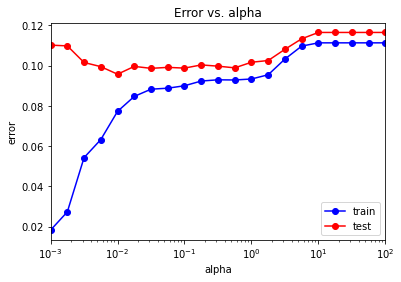

In [39]:
plt.semilogx(alpha_arr, train_err, 'b-o', label="train")
plt.semilogx(alpha_arr, test_err, 'r-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()


При малых alpha недообучение

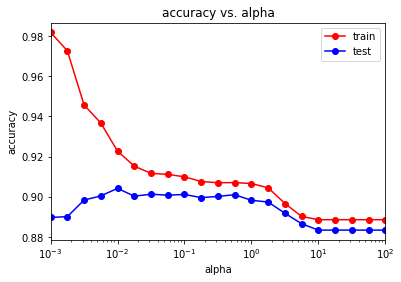

In [40]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label="train")
plt.semilogx(alpha_arr, test_acc, 'b-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

In [41]:
min_train_arr = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_arr, min_test_err)

0.018290708967303334 0.09577567370721049


In [42]:
alpha_opt = alpha_arr[test_err  == min_test_err]
print(alpha_opt)


[0.01]


In [43]:
alpha_opt_one_layer = alpha_opt[0]

 Посмотрим на два слоя:

In [44]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha,
                              hidden_layer_sizes = (100,100,), 
                              solver='adam',
                              activation = 'logistic',
                              max_iter = 1000,
                              random_state=44
                              )
    mlp_model.fit(X_train, y_train)
    
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

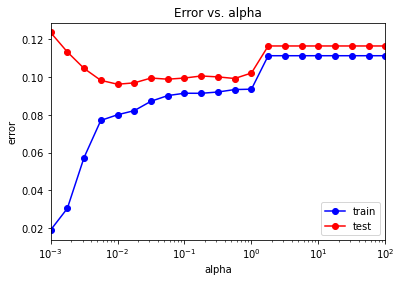

In [45]:
plt.semilogx(alpha_arr, train_err, 'b-o', label="train")
plt.semilogx(alpha_arr, test_err, 'r-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

При малых alpha недообучение

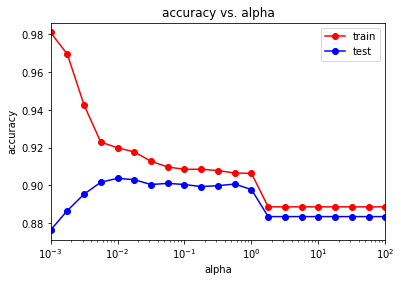

In [46]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label="train")
plt.semilogx(alpha_arr, test_acc, 'b-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

In [47]:
min_train_arr = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_arr, min_test_err)

0.018978633862091292 0.09626122845350814


In [48]:
alpha_opt = alpha_arr[test_err  == min_test_err]
print(alpha_opt)

[0.01]


In [49]:
alpha_opt_two_layers = alpha_opt[0]

In [50]:
layer_sizes = np.arange(20, 200, 10)

In [51]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for layer_size in layer_sizes:
    mlp_model = MLPClassifier(alpha=alpha_opt_one_layer,
                              hidden_layer_sizes = (layer_size,), 
                              solver='adam',
                              activation = 'logistic',
                              max_iter = 1000,
                              random_state=44
                              )
    mlp_model.fit(X_train, y_train)
    
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

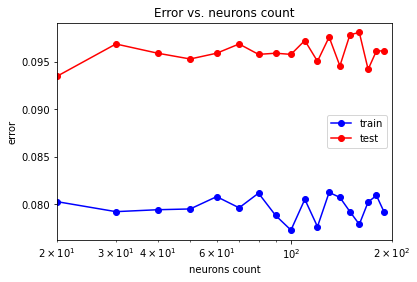

In [52]:
plt.semilogx(layer_sizes, train_err, 'b-o', label="train")
plt.semilogx(layer_sizes, test_err, 'r-o', label="test")
plt.xlim([np.min(layer_sizes), np.max(layer_sizes)])
plt.xlim([20,200])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

Недообучение/Переобучение не наблюдается

In [53]:
test_err = []
train_err = []
train_acc = []
test_acc = []

for layer_size in layer_sizes:
    mlp_model = MLPClassifier(alpha=alpha_opt_two_layers,
                              hidden_layer_sizes = (layer_size,layer_size,), 
                              solver='adam',
                              activation = 'logistic',
                              max_iter = 1000,
                              random_state=44
                              )
    mlp_model.fit(X_train, y_train)
    
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

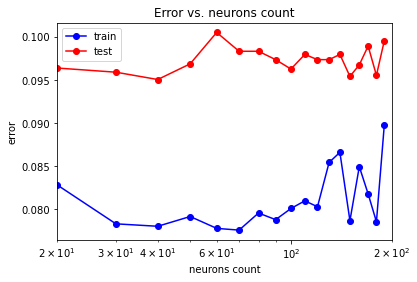

In [54]:
plt.semilogx(layer_sizes, train_err, 'b-o', label="train")
plt.semilogx(layer_sizes, test_err, 'r-o', label="test")
plt.xlim([np.min(layer_sizes), np.max(layer_sizes)])
plt.xlim([20,200])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

Теперь обучим классификатор при оптимальном alpha. Как мы увидели выше, достаточно одного слоя.

In [72]:
mlp_model = MLPClassifier(alpha=alpha_opt_one_layer,
                              hidden_layer_sizes = (100, ), 
                              solver='adam',
                              activation = 'logistic',
                              max_iter = 1000,
                              random_state=44
                              )
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07729038523794109
0.09577567370721049


### Матрица рассогласования

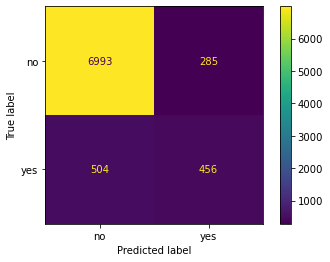

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test)

In [74]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7278
         yes       0.62      0.47      0.54       960

    accuracy                           0.90      8238
   macro avg       0.77      0.72      0.74      8238
weighted avg       0.90      0.90      0.90      8238



$$TPR = \frac{TP}{P} = 48\% \\ $$
$$TNR = \frac{TN}{N} = 96\% \\ $$
$$FPR = \frac{FP}{N} = 4\% \\ $$
$$FNR = \frac{FN}{P} = 53\% \\ $$

In [75]:
min_test_err = np.min(test_err)
min_test_err

0.09504734158776403

In [76]:
optimal_layer_size = layer_sizes[test_err == min_test_err][0]

### Натренируем модель с оптимальным количеством нейронов

In [77]:
mlp_model = MLPClassifier(alpha=alpha_opt_one_layer,
                              hidden_layer_sizes = (optimal_layer_size, ), 
                              solver='adam',
                              activation = 'logistic',
                              max_iter = 1000,
                              random_state=44
                              )
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07943509226286824
0.0958970623937849


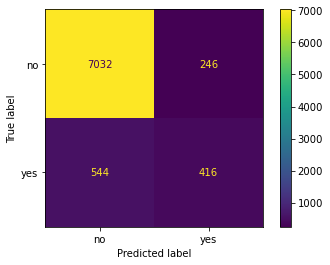

In [78]:
plot_confusion_matrix(mlp_model, X_test, y_test)

In [79]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7278
         yes       0.63      0.43      0.51       960

    accuracy                           0.90      8238
   macro avg       0.78      0.70      0.73      8238
weighted avg       0.89      0.90      0.90      8238



$$TPR = \frac{TP}{P} = 43\% \\ $$
$$TNR = \frac{TN}{N} = 97\% \\ $$
$$FPR = \frac{FP}{N} = 3\% \\ $$
$$FNR = \frac{FN}{P} = 57\% \\ $$

### Выводы

> * Оптимальное количество слоев - 1
> * Оптимальное количество нейронов - 40
> * Оптимальное alpha = 0.01